# Алгоритм поиска расстояния Дамерау-Левенштейна

## Краткое описание и реализация
**Расстояние Левенштейна** - минимальное количество операций *вставки, удаления, замены символа* для преобразования одной строки в другую. Расстояние Левенштейна между строками $W_1$ и $W_2$ может быть вычислено рекурсивно:
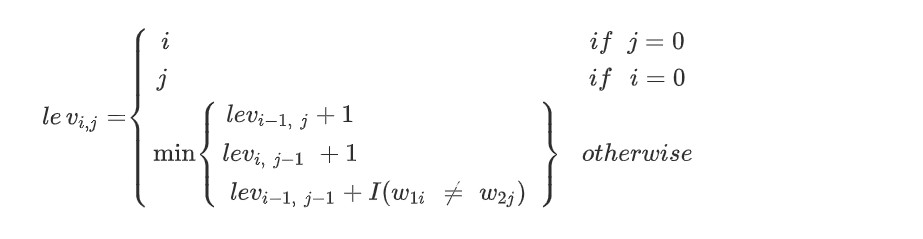
Здесь $lev_{ij}$ означает расстояние Левенштейна между подстроками (*префиксами*) исходных строк длины i и j соответственно.  


Наиболее предпочтителен **динамический подход** (оптимальное решение подзадач меньшей размерности).
Вычисляется двумерная матрица $lev[0...N][0...M]$, причем $lev[i][j]$ суть расстояние Левештейна между i-тым и j-тым префиксами соответствующих входных строк:  $lev[i][j] = lev(W_1[:i], W_2[:j])$  
Расстояние между строками $W_1$ и $W_2$ будет заключено в правой нижней ячейке построенной матрицы - в $D[N][M]$

При рассмотрении **расстояния Дамерау-Левенштейна** к числу базовых операций также добавляется операция *транспозиции*. Расстояние Дамерау-Левенштейна может быть вычислено следующим образом:
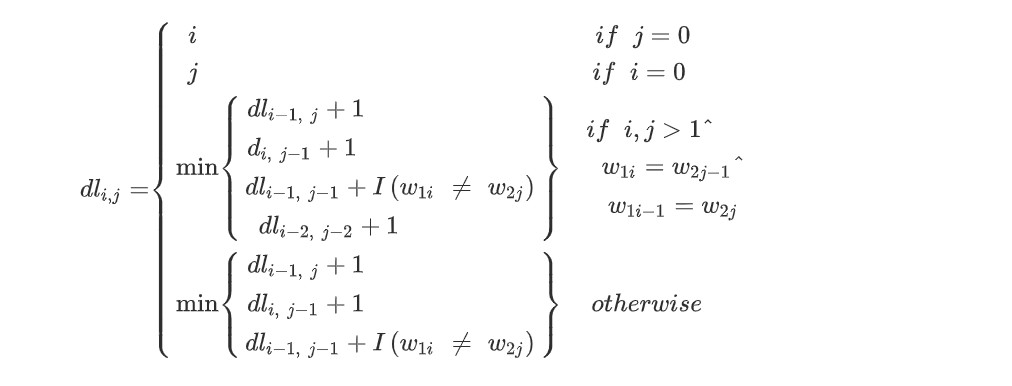
Таким образом, для подсчета расстояния Дамерау-Левенштейна, необходимо сначала вычислить расстояние Левенштейна, а затем проверить возможность *более выгодной* транспозиции символов.

(Источник: *Amazigh spell checker using Damerau-Levenshtein algorithm and N-gram, Youness Chaabi, Fadoua Ataa Allah. Journal of King Saud University - Computer and Information Sciences, 8 august 2020*)

In [6]:
def Damerau_Levenshtein_metric(str1, str2):
    f = 0 # счетчик функции трудоемкости
    N, M  = len(str1), len(str2)
    
    # инициализация матрицы D размером (N+1)x(M+1) сразу с базовым случаем
    D = [[i + j if i * j==0 else 0 for j in range(0, M+1)]
         for i in range(N + 1)]
    
    # динамический подход: постепенно будем заполнять матрицу
    f += 2
    for i in range(1, N+1):
        f += 4
        for j in range(1, M+1):
            f += 3
            if str1[i-1] == str2[j-1]:
                f += 1
                D[i][j] = D[i-1][j-1]
            else:
                f += 3
                D[i][j] = 1 + min(D[i-1][j-1], D[i-1][j], D[i][j-1])
            # на данный момент в D[i][j] подсчитано расстояние Левенштейна
            
            f += 2
            # проверка на возможную более выгодную транспозицию
            if (i > 1) and (j > 1):
                f += 2
                if (str1[i-1] == str2[j-2]) and (str1[i-2] == str2[j-1]):
                    f += 2
                    D[i][j] = min(D[i][j], D[i-2][j-2] + 1)
    
    
    return f, D[N][M]

In [7]:
# проверка работоспособности
Damerau_Levenshtein_metric('cat', 'rate') 

(118, 2)

## Входные данные и генератор
Функция, реализующая исследуемый алгоритм, принимает на вход **двe строки** и вычисляет расстояние между ними.

Генератор входных данных принимает на вход два числа - длины строк, которые необходимо сгенерировать. Алфавит состоит всего из 4 символов, соответствующий определенным нуклеотидам.

In [40]:
import random
random.seed(8) # 0, 5, 8, ...

# символы, из которых будут составляться слова
letters = 'ACGT'

def generation_random_strings(len1, len2, seed=None):
    if seed is not None:
        random.seed(seed)
        
    random_string_1 = ''.join(random.choice(letters) for i in range(len1))
    random_string_2 = ''.join(random.choice(letters) for i in range(len2))
    
    return random_string_1, random_string_2

In [41]:
# проверка работоспособности 
generation_random_strings(5, 10)

('CGTCC', 'AACCCTATTT')

# Этап предварительного исследования

## Фиксация и определение гиперпараметров предварительного исследования
В этой части необходимо зафиксировать длины входов (эти длины должны соответствовать реальной области применения алгоритма), а также определить число проводимых экспериментов. 

Рассмотрим задачу сравнения нуклеотидных последовательностей одинаковой длины. Будем сравнивать подгруппы нуклеотидных последовательностей длиной 60 символов. Число проводимых экспериментов определено с помощью *подхода, основанного на бета-распределении* (см. файл **choose number of experiments.ipynb**

In [42]:
N = 60 # длина первой строки
M = 60 # длина второй строки

NUMBER_OF_EXPERIMENTS = 169

## Проведение экспериментов

In [43]:
import numpy as np
import pandas as pd

F = []  # список, хранящий все полученные при проведении экспериментов значения трудоемкости
for i in range(NUMBER_OF_EXPERIMENTS):
    str1, str2 = generation_random_strings(N, M)
    f, res = Damerau_Levenshtein_metric(str1, str2)
    F.append(f)
F = np.array(sorted(F))
distribution = pd.Series(F, index = [f'f_{i}' for i in range(1, NUMBER_OF_EXPERIMENTS+1)], 
                         name = 'Относительное распределение трудоемкости как дискретной случайной величины')
print(distribution)

f_1      34520
f_2      34566
f_3      34566
f_4      34572
f_5      34574
         ...  
f_165    34702
f_166    34702
f_167    34708
f_168    34714
f_169    34742
Name: Относительное распределение трудоемкости как дискретной случайной величины, Length: 169, dtype: int32


## Функции трудоемкости в лучшем и худшем случае
На основе принятой модели вычислений и на основе проведенных экспериментов определим значения функции трудоемкости в лучшем и худшем случае

In [44]:
f_best_current = F[0]
f_worst_current = F[NUMBER_OF_EXPERIMENTS-1]
print(f'Значения функции трудоемкости в лучшем случае: {f_best_current}\n'
    f'Значение функции трудоемкости в худшем случае: {f_worst_current}')

Значения функции трудоемкости в лучшем случае: 34520
Значение функции трудоемкости в худшем случае: 34742


## Определение числа интервалов
Разобьем размах варьирования $f_A^{worst} - f_A^{best}$ на 7 полусегментов.

In [45]:
print(f'Размах варьирования: {f_worst_current-f_best_current}')
num_of_intervals = 7

Размах варьирования: 222


## Нормировка и построение гистограммы относительных частот
Для дальнейшей аппроксимации бета-распределением необходимо произвести нормировку значений $f_i$, полученным на этапе проведения экспериментов.

In [46]:
X = [] # нормированная выборка F

divider = f_worst_current - f_best_current

for f_i in F:    
    x_i = (f_i - f_best_current) / divider
    X.append(x_i)
X = np.array(X)
X = pd.Series(X, index = [f'x_{i}' for i in range(1, NUMBER_OF_EXPERIMENTS+1)], 
                         name = 'Нормированные значения трудоемкости')
print(X)

x_1      0.000000
x_2      0.207207
x_3      0.207207
x_4      0.234234
x_5      0.243243
           ...   
x_165    0.819820
x_166    0.819820
x_167    0.846847
x_168    0.873874
x_169    1.000000
Name: Нормированные значения трудоемкости, Length: 169, dtype: float64


Далее разобьем полученные данные на заданное количество полусегментов

In [47]:
s = num_of_intervals # число полусегментов

segments = np.linspace(X[0], X[NUMBER_OF_EXPERIMENTS-1], s+1) # проставим границы полусегментов на отрезке [0, 1]

segments_groups = pd.cut(X, bins=segments, include_lowest=True)
segments_groups.name = 'Полусегменты'

df = pd.concat([X, segments_groups], axis=1)
segments_groups = segments_groups.value_counts(sort=False)
print(segments_groups)

(-0.001, 0.143]     1
(0.143, 0.286]      7
(0.286, 0.429]     33
(0.429, 0.571]     70
(0.571, 0.714]     42
(0.714, 0.857]     14
(0.857, 1.0]        2
Name: Полусегменты, dtype: int64


In [48]:
# найдем середины интервалов
middle_of_intrvls = []
temp_intervals = np.unique(segments_groups.index) 
for ti in temp_intervals:
    middle_of_intrvls.append(ti.mid)
normalize_distribution = pd.Series(segments_groups.values, index=middle_of_intrvls,
                             name = 'Середины полусегментов')
print(normalize_distribution)

0.0710     1
0.2145     7
0.3575    33
0.5000    70
0.6425    42
0.7855    14
0.9285     2
Name: Середины полусегментов, dtype: int64


Построим гистограмму относительных частот на основе преобразованных данных

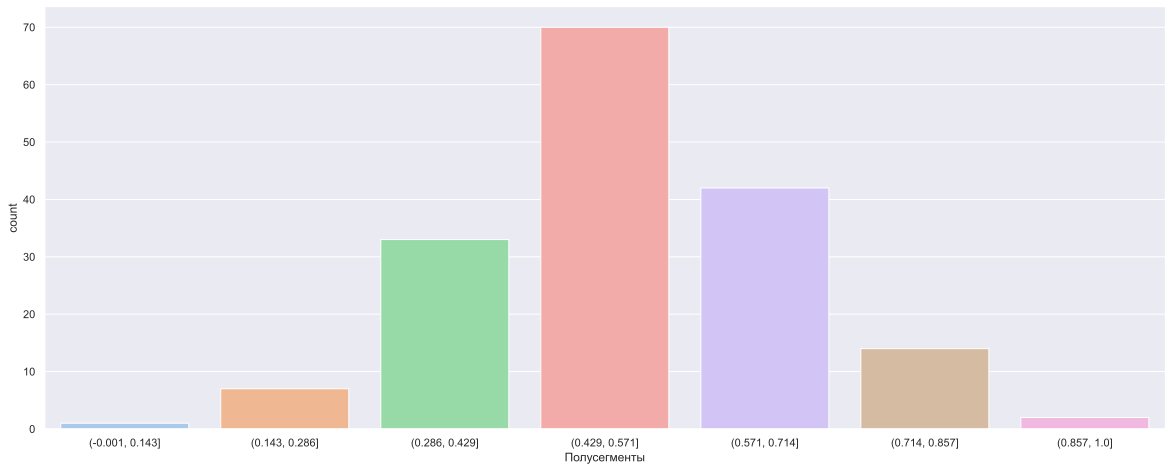

In [49]:
import seaborn as sns
from pylab import rcParams
sns.set()
rcParams['figure.figsize'] = 10, 5
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt


histogramm = sns.catplot(x="Полусегменты", kind="count", palette="pastel", data=df, height = 6.5, aspect=2.5, orient='v')
histogramm.savefig('Эмпирическое распределение частот.png')

## Вычисление выборочного среднего и выборочной исправленной дисперсии

Для вычисления используем формулы: $M_{emp}(X) =\frac{1}{n} * \sum_{i=1}^{n}{x_i}$ и $D_{emp}(X) = \frac{1}{n-1} * \sum_{i=1}^{n}{(x_i - M_{emp}(X))^2}$, где $n$ - число проводимых экспериментов

In [50]:
M_emp = np.sum(X.values) / NUMBER_OF_EXPERIMENTS
D_emp = np.sum((X.values - M_emp)**2) / (NUMBER_OF_EXPERIMENTS - 1)

print(f'Выборочное среднее = {M_emp}\nВыборочная исправленная дисперсия = {D_emp}')

Выборочное среднее = 0.5222559837944454
Выборочная исправленная дисперсия = 0.02169391982281795


## Формулировка гипотезы и вычисление параметров аппроксимирующего бета-распределения
Выдвигаем нулевую гипотезу:  
$H_0: \beta$-распределение не противоречит наблюдаемому в эксперименте распределению относительных частот трудоемкости как случайной величины.

Для нахождения параметров $\alpha$ и $\beta$ аппроксимирующего бета-распределения используется *метод моментов*: приравняем теоретические и эмпирические характеристики.    

$\begin{cases}
   \frac{\alpha}{\alpha + \beta} = M_{emp}(X)\\
   \frac{\alpha * \beta}{(\alpha + \beta)^2 * (\alpha + \beta+1)} = D_{emp}(X)
 \end{cases}$
 
 Решением системы является   
 
 $\begin{cases}
   \alpha = M_{emp}(X) * \frac{1}{D_{emp}(X)} * (M_{emp}(X) - M_{emp}^2(X) - D_{emp}(X))\\
   \beta =  \frac{1-M_{emp}(X)}{D_{emp}(X)} * (M_{emp}(X) - M_{emp}^2(X) - D_{emp}(X))
 \end{cases}$

In [51]:
import numpy as np
import pandas as pd

a = (M_emp / D_emp) * (M_emp - M_emp**2 - D_emp)
b = ((1 - M_emp) / D_emp) * (M_emp - M_emp**2 - D_emp)
print(f'Параметры для аппроксимирующего бета-распределения: alpha = {a}, beta = {b}')

Параметры для аппроксимирующего бета-распределения: alpha = 5.484279883188579, beta = 5.01685376269634


## Расчет теоретических вероятностей
На прошлых шагах было получено аппроксимирующее гистограмму относительных частот бета-распределение и выдвинута гипотеза о непротиворечивости аппроксимации. Для проверки гипотезы необходимо подсчитать значение критерия согласия Пирсона, которое, как известно, требует знания теоретических частот (или вероятностей).  
Таким образом, необходимо вычислить теоретические вероятности рассматриваемого бета-распределения на нашем диапазоне. С этой целью вычислим значения интегралов от функции плотности бета-распределения на всех полусегментах $[x^b_{i}, x^b_{i+1}]$, то есть $p_i=\int_{x^b_i}^{x^b_{i+1}} f(x)dx$, где $f(x)$ - функция плотности бета-распределения, а $x^b_{i}$ - границы полусегментов.

In [52]:
import scipy.integrate as integrate
from scipy.stats import beta

# плотность бета-распределения
beta_distrub = lambda x: beta.pdf(x,a,b)

# теоретические значения вероятностей через определенный интеграл 
approximate_probability = []
for i in range(num_of_intervals):
    value, err = integrate.quad(beta_distrub, segments[i], segments[i+1])
    approximate_probability.append(value)
    
approximate_probability = np.array(approximate_probability)

# проверка, что сумма теоретических вероятностей ~ 1
print(sum(approximate_probability))

1.0000000000000022


## Расчет наблюдаемоего значения критерия
Для проверки гипотезы используем критерий согласия Пирсона. Вычислим наблюдаемое значение критерия по формуле $\chi^2_{current} = n * \sum_{i=1}^s{\frac{(w_i - p_i)^2}{p_i}}$, где $n$ - число экспериментов, $p_i$ - теоретические вероятности, $w_i$ - эмпирические (относительные) вероятности, $s$ - число экспериментов

In [53]:
from scipy.stats import chi2

emperic_probability = normalize_distribution.values / NUMBER_OF_EXPERIMENTS 
P = approximate_probability
W = emperic_probability
print(f'P = {P}')
print(f'W = {W}')



PEARSON_current = np.sum((W-P)**2 / P)
PEARSON_current *= NUMBER_OF_EXPERIMENTS
print('Наблюдаемое значение критерия - ', PEARSON_current)

sigma = 0.05 # уровень значимости
PEARSON_theory = chi2.isf(q=sigma, df=num_of_intervals-2-1)
print('Теоретическое значение критерия - ', PEARSON_theory)

P = [0.00228596 0.05494101 0.21545157 0.34672758 0.27912886 0.09556312
 0.0059019 ]
W = [0.00591716 0.04142012 0.19526627 0.41420118 0.24852071 0.08284024
 0.01183432]
Наблюдаемое значение критерия -  5.937054317189174
Теоретическое значение критерия -  9.487729036781158


## Проверка гипотезы
Для принятия или отвержения выдвинутой гипотезы необходимо сравнить полученное наблюдаемое значение критерия с теоретическим.

In [54]:
if PEARSON_current < PEARSON_theory:
    print('Гипотезу о согласовании принимают')
else:
    print('Гипотезу о согласовании отклоняют')

Гипотезу о согласовании принимают


Поскольку наблюдаемое значение критерия **не попадает** в критическую область, то с заданным уровнем значимости $\sigma=0.05$ гипотезу о согласовании эмпирического закона распределения с аппроксимирующим непрерывным бета-распределением принимают.

На основе проведенных исследований, мы можем построить интервал $[0, x_{1-\sigma}]$, в который с вероятностью $1-\sigma$ попадет нормированное значение трудоемкости $x$. Далее, переходя от нормированных значений к исходным, мы получим **доверительную трудоемкость** $f_{1-\sigma}$. Таким образом, с вероятностью  $1-\sigma$ значение трудоемкости $f$ для фиксированной длины входа (в нашем случае N=M=60) будет заключено в интервале $[f^{best}_A, f_{1-\sigma}]$. Заметим, что этот сегмент варьирования оказался меньше исходного интервала варьирования трудоемкости $[f^{best}_A, f^{worst}_A]$

In [55]:
x_quantile = beta.ppf(1-sigma, a, b)
print(f'Левый {1-sigma}-квантиль бета-распределения: {x_quantile}')

f_quantile = f_best_current + (f_worst_current-f_best_current) * x_quantile
f_quantile = round(f_quantile)
print(f'Доверительная трудоемкость для единичного входа при фиксированной длине N=M={N}: {f_quantile}')
print(f'Таким образом, с вероятностью {(1-sigma)*100}% трудоемкость алгоритма вычисления расстояния Дамерау-Левенштейна (при N=M={N}) попадет в [{f_best_current}, {f_quantile}]')

Левый 0.95-квантиль бета-распределения: 0.7626466883245446
Доверительная трудоемкость для единичного входа при фиксированной длине N=M=60: 34689
Таким образом, с вероятностью 95.0% трудоемкость алгоритма вычисления расстояния Дамерау-Левенштейна (при N=M=60) попадет в [34520, 34689]


C:\Users\tolik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Вероятность, что нормированная трудоемкость x > 0.763) = 0.05')

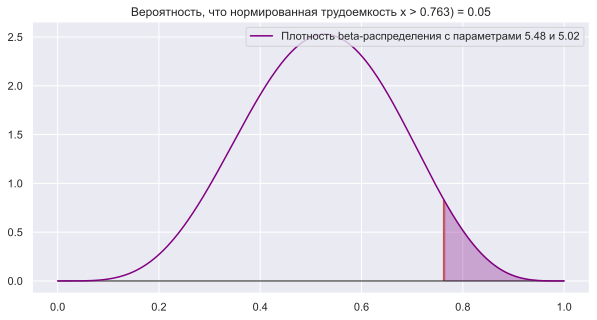

In [56]:
fig, ax = plt.subplots()
x=np.linspace(0,1,300)
# график плотности
sns.lineplot(x,y=beta.pdf(x, a, b),
            label=f'Плотность beta-распределения с параметрами {round(a,2)} и {round(b,2)}',
            ax=ax, color='purple')
ax.legend(loc='upper right') 

# вертикальная линия
ax.vlines(x_quantile,0, beta.pdf(x_quantile,a,b), lw=2, color='r')
ax.hlines(0, x.min(), x.max(), lw=1, color='k')

ax.fill_between(x[x>x_quantile],
                beta.pdf(x[x>x_quantile],a,b),
                alpha = 0.3, color='purple')
ax.set_title(f'Вероятность, что нормированная трудоемкость x > {round(x_quantile,3)}) = {sigma}')

In [57]:
difference = (f_worst_current - f_best_current) / (f_quantile - f_best_current)
print(f'Интервал сократился в {round(difference, 2)} раз')

Интервал сократился в 1.31 раз


# Этап основного исследования
На данном этапе определеим значения доверительной трудоемкости как функции длины входа с помощью экстраполяции

Сегмент значений, соответствующий особенностям применения:  $[60:250]$  

Сегмент значений, на котором будут производиться вычисления: $[60:180]$

Шаг изменения длины входа:  $step = 10$

Число экспериментов - $169$

In [114]:
N_all = np.arange(60, 251)
N_array = np.linspace(60, 180, 13) # от 60 до 180 с шагом 10
m = 169

**Функция для проведения исследования**

In [91]:
def epoch(N_current, m=169):
    print(f'Текущая длина входа = {N_current}')
    F = []  # список, хранящий все полученные при проведении экспериментов значения трудоемкости
    for i in range(m):
        str1, str2 = generation_random_strings(N_current, N_current)
        f, res = Damerau_Levenshtein_metric(str1, str2)
        F.append(f)
    F = np.array(sorted(F))
    
    f_best_current = F[0]
    f_worst_current = F[m-1]
    print(f'Значения функции трудоемкости в лучшем случае: {f_best_current}\n'
            f'Значение функции трудоемкости в худшем случае: {f_worst_current}')
    
    X = [] # нормированная выборка F
    divider = f_worst_current - f_best_current
    for f_i in F:    
        x_i = (f_i - f_best_current) / divider
        X.append(x_i)
    X = np.array(X)
    
    
    M_emp = np.sum(X) / m
    D_emp = np.sum((X - M_emp)**2) / (m - 1)

    print(f'Выборочное среднее = {M_emp}\nВыборочная исправленная дисперсия = {D_emp}')
    print()
    
#     a = (M_emp / D_emp) * (M_emp - M_emp**2 - D_emp)
#     b = ((1 - M_emp) / D_emp) * (M_emp - M_emp**2 - D_emp)
#     print(f'Параметры для аппроксимирующего бета-распределения: alpha = {a}, beta = {b}')
    
    return M_emp, D_emp, f_best_current, f_worst_current

In [102]:
random.seed(0)
dispersion = []
exception = []
worst = []
best = []
for n_i in N_array:
    e, d, f_best, f_worst = epoch(N_current=int(n_i), m=169)
    exception.append(e)
    dispersion.append(d)
    best.append(f_best)
    worst.append(f_worst)

Текущая длина входа = 60
Значения функции трудоемкости в лучшем случае: 34560
Значение функции трудоемкости в худшем случае: 34732
Выборочное среднее = 0.4885785055731388
Выборочная исправленная дисперсия = 0.034707424497123704

Текущая длина входа = 70
Значения функции трудоемкости в лучшем случае: 47010
Значение функции трудоемкости в худшем случае: 47280
Выборочное среднее = 0.5152750383519614
Выборочная исправленная дисперсия = 0.023689201656912955

Текущая длина входа = 80
Значения функции трудоемкости в лучшем случае: 61452
Значение функции трудоемкости в худшем случае: 61668
Выборочное среднее = 0.5893600701293009
Выборочная исправленная дисперсия = 0.04042679263773756

Текущая длина входа = 90
Значения функции трудоемкости в лучшем случае: 77768
Значение функции трудоемкости в худшем случае: 78138
Выборочное среднее = 0.4877019030865185
Выборочная исправленная дисперсия = 0.0226017349510073

Текущая длина входа = 100
Значения функции трудоемкости в лучшем случае: 96036
Значение

Text(0, 0.5, 'Выборочная дисперсия')

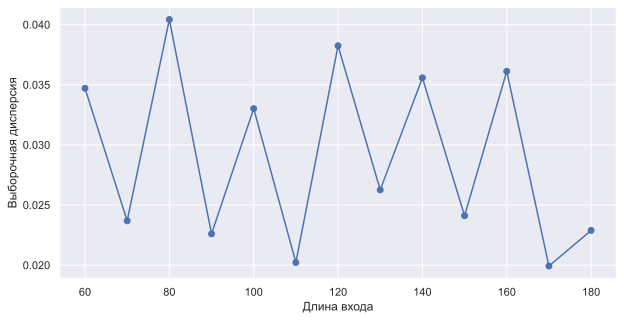

In [108]:
plt.plot(N_array, dispersion, 'o-')
plt.xlabel('Длина входа')
plt.ylabel('Выборочная дисперсия')

Text(0, 0.5, 'Выборочное среднее')

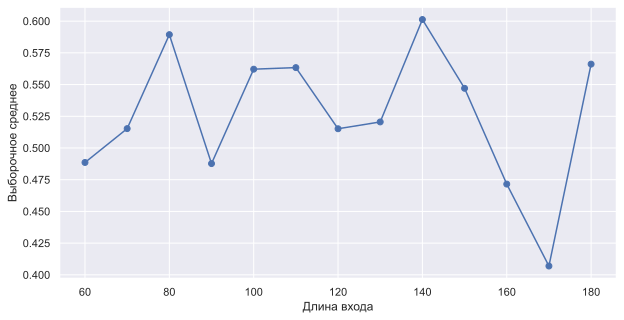

In [107]:
plt.plot(N_array, exception, 'o-')
plt.xlabel('Длина входа')
plt.ylabel('Выборочное среднее')

Text(0, 0.5, 'Функция трудоемкости в лучшем случае')

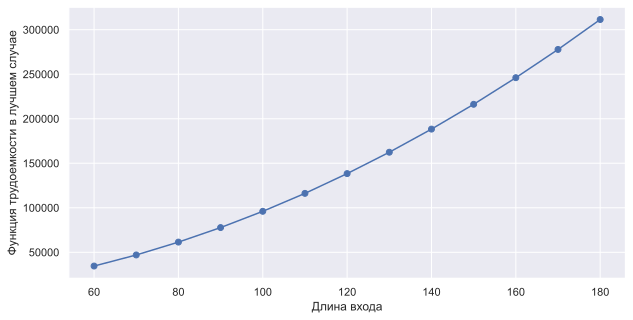

In [110]:
plt.plot(N_array, best, '-o')
plt.xlabel('Длина входа')
plt.ylabel('Функция трудоемкости в лучшем случае')

Text(0, 0.5, 'Функция трудоемкости в худшем случае')

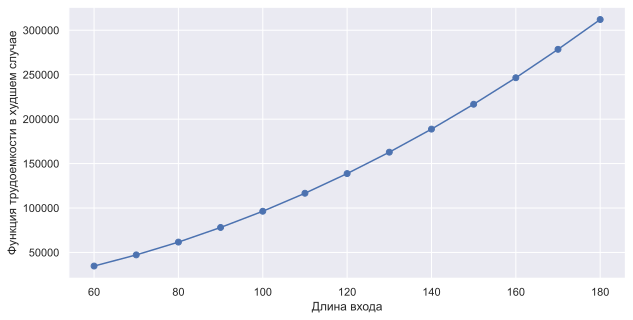

In [109]:
plt.plot(N_array, worst, 'o-')
plt.xlabel('Длина входа')
plt.ylabel('Функция трудоемкости в худшем случае')

Далее построим **уравнения регрессии** для выборочного среднего, выборочной дисперсии, функции трудоемкости в лучшем и худшем случаях. Для этого используем MS Excel и MATLAB.

In [155]:
func_f_best = lambda n: 9.6296*n**2 - 3.1575*n + 62.919
func_f_worst = lambda n: 9.634*n**2 - 0.5795*n + 99.183
 
# выборочное среднее как функция длины входа
func_except = lambda n: 7.743118401209710e-10 * n**5 - 4.549164438504658e-07 * n**4 + 1.036605113636866e-04 * n**3 - 0.011440439351096 * n**2 + 0.611244445153264 * n - 12.110080378453997

# выборочная дисперсия как функция длины входа
func_disp = lambda n: 5.820354457875983e-15 * n**8 - 5.596109496739772e-12 * n**7 + 2.313455851776037e-09 * n**6 - 5.365856875989025e-07 * n**5 + 7.630016384017200e-05 * n**4 - 0.006805059549758*n**3 + 0.371461648282499 * n**2 - 11.338927857267537 * n + 1.481513360533674e+02

Вычислим параметры аппроксимирующего бета-распределения как функции длины входа

In [156]:
alpha_func = lambda n: abs((func_except(n) / func_disp(n)) * (func_except(n) - func_except(n)*func_except(n) - func_disp(n)))
beta_func = lambda n: abs(((1 - func_except(n)) / func_disp(n)) * (func_except(n) - func_except(n)*func_except(n) - func_disp(n)))

Вычислим значение левого 0.95 квантиля бета-распределения как функцию длины.

**Построим доверительную трудоемкость как функцию длины входа.**

In [157]:
x_quantile_func = lambda n: beta.ppf(0.95, alpha_func(n), beta_func(n))
f_quantile_func = lambda n: func_f_best(n) + x_quantile_func(n) * (func_f_worst(n) - func_f_best(n))

# Анализ полученных результатов и вывод

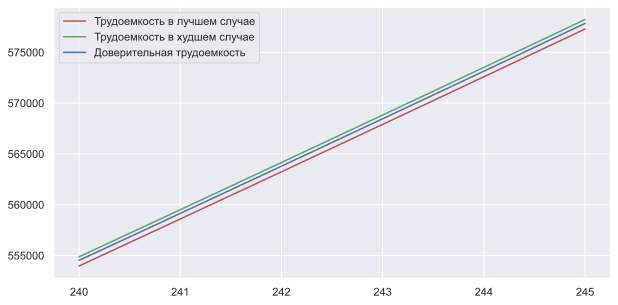

In [179]:
N_all = np.linspace(240, 245, 15) # разница очень плохо видна на большом масштабе
plt.plot(N_all, func_f_best(N_all),'r', label='Трудоемкость в лучшем случае')
plt.plot(N_all, func_f_worst(N_all),'g', label='Трудоемкость в худшем случае')
plt.plot(N_all, f_quantile_func(N_all),'b', label='Доверительная трудоемкость')
plt.legend()

Абсолютное ошибка - absolute error

In [188]:
n_segment = np.linspace(60, 250, 20)
MAE_pred = np.sum(abs(f_quantile_func(n_segment) - func_f_best(n_segment))) / 20
MAE_orig = np.sum(abs(func_f_worst(n_segment) - func_f_best(n_segment))) / 20
print(f'MAE_pred={MAE_pred}, MAE_orig={MAE_orig}')

MAE_pred=428.9612884027421, MAE_orig=556.1940000000257
